<a href="https://colab.research.google.com/github/fatimazain118/SVM-Kernel-and-Stacking-Ensemble/blob/main/SVM_Models_%26_Stacking_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [2]:
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

In [3]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('sig', SVC(kernel='sigmoid')))
	level0.append(('lin', SVC(kernel='linear')))
	level0.append(('poly', SVC(kernel='poly')))
	level0.append(('rbf', SVC(kernel='rbf')))
	# define meta learner model
	level1 = SVC(kernel='rbf')
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [4]:
def get_models():
	models = dict()
	models['lin'] = SVC(kernel='linear')
	models['sig'] = SVC(kernel='sigmoid')
	models['poly'] = SVC(kernel='poly')
	models['rbf'] = SVC(kernel='rbf')

	models['stacking'] = get_stacking()
	return models

In [5]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [6]:
X, y = get_dataset()

In [7]:
models = get_models()

In [8]:
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lin 0.869 (0.028)
>sig 0.738 (0.039)
>poly 0.903 (0.026)
>rbf 0.957 (0.020)
>stacking 0.951 (0.021)


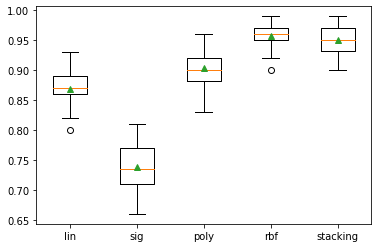

In [9]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()